In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sbn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
egitim_df = pd.read_csv("/kaggle/input/datathon2023/train.csv")
test_df = pd.read_csv("/kaggle/input/datathon2023/test_x.csv")

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

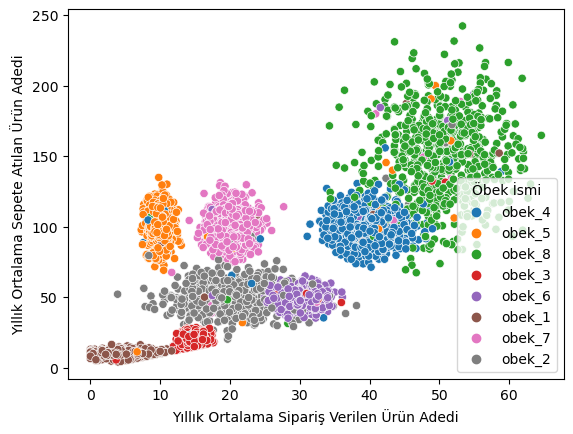

In [4]:
sbn.scatterplot(x="Yıllık Ortalama Sipariş Verilen Ürün Adedi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=egitim_df, hue="Öbek İsmi")

## Öbek'lerin Gelir/Harcama Grafiği

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

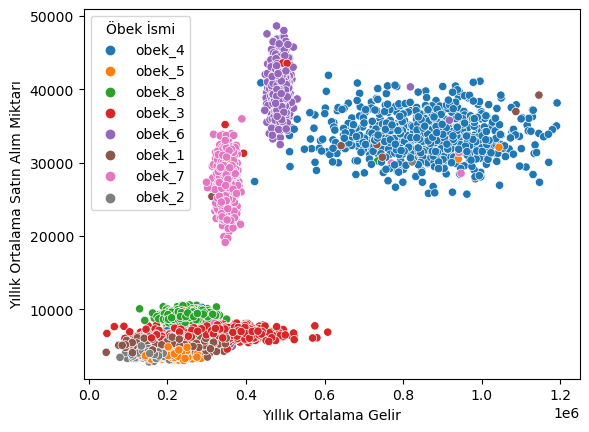

In [5]:
sbn.scatterplot(x="Yıllık Ortalama Gelir",y="Yıllık Ortalama Satın Alım Miktarı",data=egitim_df, hue="Öbek İsmi")

### obek_1 Temizleme

In [6]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_1'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
4078,4078,Erkek,18-30,Bekar,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,1.146086e+06,Büyük Şehir,Spor Malzemeleri,39189.386395,40.292106,Etmiyor,obek_1,96.433900
4739,4739,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,1.087402e+06,Büyük Şehir,Elektronik ve Teknolojik Ürünler,36948.168839,38.959780,Etmiyor,obek_1,89.419409
2095,2095,Kadın,18-30,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,9.840878e+05,Büyük Şehir,Spor Malzemeleri,27789.044498,41.561571,Etmiyor,obek_1,86.150238
520,520,Kadın,18-30,Bekar,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,9.344579e+05,Büyük Şehir,Kozmetik,34783.960849,40.120097,Etmiyor,obek_1,102.106582
5067,5067,Erkek,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,7.472945e+05,Büyük Şehir,Spor Malzemeleri,30731.781951,40.512400,Etmiyor,obek_1,108.493702
3119,3119,Kadın,18-30,Bekar,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,7.452391e+05,Kırsal,Spor Malzemeleri,33692.769467,41.954315,Etmiyor,obek_1,96.802851
3464,3464,Kadın,31-40,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,7.332160e+05,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32446.609562,42.349283,Etmiyor,obek_1,111.476808
4192,4192,Erkek,18-30,Evli,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,6.422759e+05,Büyük Şehir,Giyim,32303.135410,39.445320,Etmiyor,obek_1,99.077272
4155,4155,Kadın,51-60,Bekar,Üniversite Mezunu,Emekli,4.890741e+05,Kırsal,Giyim,41682.122155,29.991968,Etmiyor,obek_1,48.663886
2051,2051,Kadın,>60,Evli,Üniversite Mezunu,Emekli,4.806232e+05,Köy veya Kasaba,Kozmetik,39187.602785,30.761572,Etmiyor,obek_1,46.467251


In [7]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_1"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:8].index
egitim_df.drop(index_to_del,inplace=True)

### obek_2 Temzileme

In [8]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_2'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(20)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
1838,1838,Erkek,31-40,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,893623.639182,Köy veya Kasaba,Giyim,37594.177452,36.141950,Etmiyor,obek_2,98.725375
4821,4821,Kadın,31-40,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,823027.943149,Büyük Şehir,Kozmetik,30093.035794,42.205827,Etmiyor,obek_2,102.189691
517,517,Kadın,51-60,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,498800.002166,Kırsal,Giyim,43853.789812,31.474039,Etmiyor,obek_2,47.131863
279,279,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,488279.170295,Kırsal,Spor Malzemeleri,34872.936168,28.399891,Etmiyor,obek_2,44.772304
4397,4397,Erkek,>60,Evli,Üniversite Mezunu,Emekli,485057.974840,Kırsal,Elektronik ve Teknolojik Ürünler,39228.928368,25.978994,Etmiyor,obek_2,59.012506
1412,1412,Kadın,51-60,Bekar,Üniversite Mezunu,Emekli,480722.288321,Kırsal,Giyim,38594.892560,30.154917,Etmiyor,obek_2,46.237439
4869,4869,Erkek,51-60,Evli,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,478345.619888,Kırsal,Ev ve Mobilya,40078.835707,29.401299,Etmiyor,obek_2,49.017628
197,197,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,472943.550533,Küçük Şehir,Elektronik ve Teknolojik Ürünler,42866.355756,29.982114,Etmiyor,obek_2,49.439834
3829,3829,Kadın,51-60,Evli,Üniversite Mezunu,Emekli,464256.193932,Köy veya Kasaba,Ev ve Mobilya,42122.130852,25.021009,Etmiyor,obek_2,46.369106
4187,4187,Kadın,41-50,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,367740.269467,Büyük Şehir,Giyim,30556.674024,22.993931,Ediyor,obek_2,93.227794


In [9]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_2"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:2].index
egitim_df.drop(index_to_del,inplace=True)

### obek_3 Temizleme

In [10]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_3'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=True).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
5100,5100,Erkek,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,45695.091498,Küçük Şehir,Spor Malzemeleri,6740.639692,15.557786,Ediyor,obek_3,16.284374
3994,3994,Erkek,18-30,Evli,İlkokul Mezunu,Kendi İşinin Sahibi,64602.211420,Küçük Şehir,Giyim,7665.470994,15.693102,Etmiyor,obek_3,16.131686
4785,4785,Erkek,51-60,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,89054.088545,Kırsal,Spor Malzemeleri,7712.414014,16.845271,Etmiyor,obek_3,20.726040
2600,2600,Erkek,41-50,Bekar,İlkokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,91624.422378,Büyük Şehir,Ev ve Mobilya,6081.115958,13.401723,Etmiyor,obek_3,22.469866
4881,4881,Erkek,18-30,Bekar,Lise Mezunu,Kendi İşinin Sahibi,103886.792413,Köy veya Kasaba,Spor Malzemeleri,6956.508652,16.792215,Etmiyor,obek_3,16.792215
2027,2027,Erkek,>60,Bekar,İlkokul Mezunu,Kendi İşinin Sahibi,114113.821886,Küçük Şehir,Spor Malzemeleri,5710.957491,16.507093,Etmiyor,obek_3,17.435652
699,699,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,121630.011126,Kırsal,Ev ve Mobilya,6316.561478,15.265404,Etmiyor,obek_3,19.557423
3617,3617,Erkek,>60,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,123304.480679,Büyük Şehir,Giyim,6341.388494,15.000595,Etmiyor,obek_3,21.222269
913,913,Erkek,41-50,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,123532.145934,Küçük Şehir,Giyim,4512.749964,4.482310,Etmiyor,obek_3,12.138455
2707,2707,Erkek,31-40,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,131153.300554,Kırsal,Spor Malzemeleri,6910.237275,14.648001,Etmiyor,obek_3,15.206220


### obek_4 Temizleme

In [11]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_4'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=True).head(30)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
5238,5238,Kadın,51-60,Evli,Doktora Ötesi,İşsiz veya Düzenli Bir İşi Yok,109362.778379,Kırsal,Ev ve Mobilya,3910.726941,23.100587,Etmiyor,obek_4,59.647946
24,24,Erkek,31-40,Bekar,Üniversite Mezunu,Kendi İşinin Sahibi,141995.912615,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,6679.541796,1.229613,Etmiyor,obek_4,9.905579
2228,2228,Kadın,31-40,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,162580.270834,Köy veya Kasaba,Giyim,4954.514968,7.763879,Etmiyor,obek_4,8.895430
3335,3335,Erkek,51-60,Evli,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,176224.148431,Küçük Şehir,Giyim,5205.294172,7.063612,Etmiyor,obek_4,9.315379
3766,3766,Kadın,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,179077.571807,Kırsal,Ev ve Mobilya,4636.447610,20.269022,Etmiyor,obek_4,65.486391
3118,3118,Erkek,18-30,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,193383.544847,Küçük Şehir,Kozmetik,3596.286924,11.072455,Etmiyor,obek_4,82.125176
1594,1594,Erkek,18-30,Bekar,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,194577.137962,Küçük Şehir,Spor Malzemeleri,4364.171548,10.757811,Etmiyor,obek_4,91.916297
5082,5082,Erkek,31-40,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,199255.467690,Köy veya Kasaba,Spor Malzemeleri,3822.700390,10.594178,Etmiyor,obek_4,111.364348
3873,3873,Erkek,31-40,Evli,Ortaokul Mezunu,Düzenli ve Ücretli Bir İşi Var,199658.992878,Küçük Şehir,Giyim,7121.858785,14.034440,Etmiyor,obek_4,21.259260
1044,1044,Erkek,18-30,Bekar,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,207000.126861,Küçük Şehir,Spor Malzemeleri,9093.037915,47.852325,Ediyor,obek_4,150.254647


In [12]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_4"].sort_values("Yıllık Ortalama Gelir",ascending=True).iloc[0:30].index
egitim_df.drop(index_to_del,inplace=True)

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

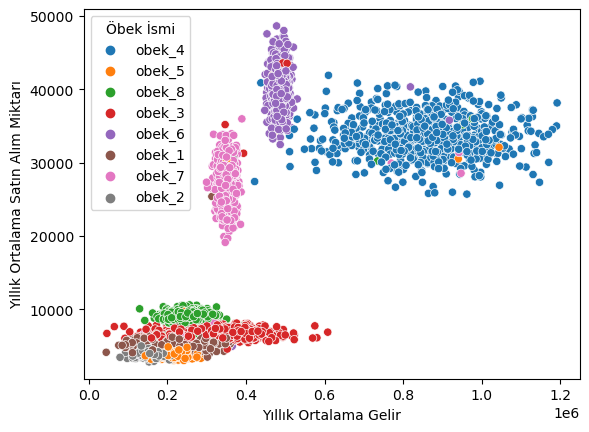

In [13]:
sbn.scatterplot(x="Yıllık Ortalama Gelir",y="Yıllık Ortalama Satın Alım Miktarı",data=egitim_df, hue="Öbek İsmi")

### obek_5 Temizleme

In [14]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_5'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
5197,5197,Erkek,18-30,Bekar,Yüksek Lisans Mezunu,İşsiz veya Düzenli Bir İşi Yok,1.044463e+06,Büyük Şehir,Spor Malzemeleri,32078.509606,41.289092,Etmiyor,obek_5,98.207299
4080,4080,Kadın,31-40,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,9.407289e+05,Büyük Şehir,Elektronik ve Teknolojik Ürünler,30497.936685,41.505730,Etmiyor,obek_5,111.586852
1682,1682,Erkek,31-40,Bekar,Yüksek Lisans Mezunu,İşsiz veya Düzenli Bir İşi Yok,9.313865e+05,Büyük Şehir,Ev ve Mobilya,32224.451659,34.878606,Etmiyor,obek_5,86.016851
948,948,Erkek,51-60,Evli,Eğitimsiz,Düzenli ve Ücretli Bir İşi Var,4.977164e+05,Köy veya Kasaba,Spor Malzemeleri,37383.233049,30.131660,Etmiyor,obek_5,42.805583
3451,3451,Kadın,51-60,Evli,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,4.907208e+05,Köy veya Kasaba,Giyim,37418.421087,29.525653,Etmiyor,obek_5,51.294876
2071,2071,Kadın,51-60,Bekar,Üniversite Mezunu,Emekli,4.807151e+05,Köy veya Kasaba,Ev ve Mobilya,41933.867058,32.627430,Etmiyor,obek_5,57.655033
1743,1743,Erkek,51-60,Evli,Üniversite Mezunu,Emekli,4.720378e+05,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,34225.242212,28.740926,Etmiyor,obek_5,55.299609
440,440,Erkek,51-60,Bekar,İlkokul Mezunu,Kendi İşinin Sahibi,4.686457e+05,Köy veya Kasaba,Ev ve Mobilya,42128.088796,31.093283,Etmiyor,obek_5,49.664187
2781,2781,Erkek,18-30,Evli,İlkokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,3.990777e+05,Küçük Şehir,Elektronik ve Teknolojik Ürünler,6681.445347,16.693729,Etmiyor,obek_5,22.138178
3849,3849,Erkek,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,3.759626e+05,Büyük Şehir,Ev ve Mobilya,26447.748889,20.492423,Etmiyor,obek_5,84.768952


In [15]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_5"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:3].index
egitim_df.drop(index_to_del,inplace=True)

### obek_6 Temizleme

In [16]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_6'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
1304,1304,Kadın,31-40,Bekar,Doktora Ötesi,İşsiz veya Düzenli Bir İşi Yok,982577.850755,Büyük Şehir,Spor Malzemeleri,31052.805183,39.484071,Etmiyor,obek_6,92.686737
4073,4073,Erkek,31-40,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,918053.461238,Büyük Şehir,Giyim,35759.119093,38.346326,Etmiyor,obek_6,107.037417
51,51,Erkek,18-30,Bekar,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,842848.370144,Büyük Şehir,Kozmetik,35190.744556,38.458701,Etmiyor,obek_6,92.836204
160,160,Erkek,31-40,Bekar,Doktora Mezunu,Kendi İşinin Sahibi,818734.162299,Büyük Şehir,Kozmetik,40308.093794,39.308723,Etmiyor,obek_6,94.978247
2072,2072,Kadın,51-60,Bekar,Üniversite Mezunu,Emekli,530359.041937,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,38660.421280,30.570197,Etmiyor,obek_6,51.471497
2419,2419,Erkek,51-60,Bekar,Üniversite Mezunu,Emekli,521098.758718,Köy veya Kasaba,Ev ve Mobilya,37416.352548,28.892373,Etmiyor,obek_6,45.028832
3136,3136,Kadın,>60,Evli,Yüksekokul Mezunu,Emekli,520797.732207,Köy veya Kasaba,Giyim,45718.067687,29.044744,Etmiyor,obek_6,52.145617
3419,3419,Erkek,>60,Bekar,Doktora Ötesi,Emekli,520020.189366,Kırsal,Spor Malzemeleri,42984.105949,27.945795,Etmiyor,obek_6,38.810587
298,298,Kadın,51-60,Bekar,Üniversite Mezunu,Emekli,516976.812431,Köy veya Kasaba,Giyim,41359.967503,31.420510,Etmiyor,obek_6,45.845961
423,423,Erkek,51-60,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,516159.990983,Kırsal,Spor Malzemeleri,34733.644847,29.492882,Etmiyor,obek_6,43.465193


In [17]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_6"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:4].index
egitim_df.drop(index_to_del,inplace=True)

### obek_7 Temizleme

In [18]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_7'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
1518,1518,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,963312.511965,Büyük Şehir,Ev ve Mobilya,33867.624751,41.269029,Etmiyor,obek_7,91.801542
4824,4824,Kadın,18-30,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,947765.907308,Büyük Şehir,Spor Malzemeleri,28548.632945,41.705582,Ediyor,obek_7,86.158821
4787,4787,Kadın,31-40,Evli,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,942374.043031,Büyük Şehir,Ev ve Mobilya,31364.151958,43.400081,Etmiyor,obek_7,104.415465
3352,3352,Erkek,31-40,Bekar,Yüksek Lisans Mezunu,İşsiz veya Düzenli Bir İşi Yok,827339.892853,Büyük Şehir,Spor Malzemeleri,34199.115661,39.113679,Etmiyor,obek_7,85.451528
3066,3066,Erkek,31-40,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,770627.191391,Büyük Şehir,Giyim,32950.270747,40.664631,Etmiyor,obek_7,94.678200
1513,1513,Kadın,31-40,Bekar,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,770085.363276,Büyük Şehir,Ev ve Mobilya,29931.035808,44.299847,Etmiyor,obek_7,85.679115
1535,1535,Erkek,51-60,Evli,Doktora Mezunu,Emekli,501378.054536,Kırsal,Giyim,40537.864534,33.445144,Etmiyor,obek_7,50.950415
1024,1024,Kadın,51-60,Evli,Yüksekokul Mezunu,Emekli,491623.447788,Kırsal,Elektronik ve Teknolojik Ürünler,44282.803924,30.123415,Etmiyor,obek_7,47.251877
2749,2749,Kadın,51-60,Evli,Üniversite Mezunu,Kendi İşinin Sahibi,490466.437771,Köy veya Kasaba,Ev ve Mobilya,40840.784670,33.033454,Etmiyor,obek_7,53.920909
4873,4873,Erkek,51-60,Evli,Üniversite Mezunu,Kendi İşinin Sahibi,479206.469957,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,38862.494641,32.438718,Etmiyor,obek_7,46.430996


In [19]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_7"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:6].index
egitim_df.drop(index_to_del,inplace=True)

### obek_8 Temizleme

In [20]:
egitim_df[egitim_df['Öbek İsmi'] == 'obek_8'].sort_values(by='Yıllık Ortalama Gelir' ,ascending=False).head(10)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
4591,4591,Kadın,31-40,Bekar,Yüksekokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,977308.081045,Kırsal,Kozmetik,35979.378668,37.713721,Etmiyor,obek_8,88.451286
3534,3534,Kadın,31-40,Bekar,Doktora Mezunu,İşsiz veya Düzenli Bir İşi Yok,952052.792201,Büyük Şehir,Elektronik ve Teknolojik Ürünler,35158.971667,43.774676,Etmiyor,obek_8,115.800998
1719,1719,Kadın,18-30,Bekar,Doktora Ötesi,İşsiz veya Düzenli Bir İşi Yok,950278.428435,Büyük Şehir,Giyim,35101.821547,40.930477,Etmiyor,obek_8,91.279944
1823,1823,Erkek,18-30,Evli,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,947055.383939,Büyük Şehir,Spor Malzemeleri,32291.190486,43.178019,Etmiyor,obek_8,91.225171
260,260,Erkek,31-40,Bekar,İlkokul Mezunu,Kendi İşinin Sahibi,760811.769245,Büyük Şehir,Ev ve Mobilya,34405.477978,44.946463,Etmiyor,obek_8,103.598752
791,791,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,735170.255527,Büyük Şehir,Giyim,30224.662490,42.513852,Etmiyor,obek_8,120.993783
3100,3100,Kadın,>60,Evli,Üniversite Mezunu,Emekli,491296.948297,Köy veya Kasaba,Kozmetik,42293.370757,27.937380,Etmiyor,obek_8,52.378990
3235,3235,Erkek,18-30,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,393538.148514,Büyük Şehir,Ev ve Mobilya,7782.129408,14.735610,Etmiyor,obek_8,16.479551
3131,3131,Erkek,51-60,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,376179.908965,Büyük Şehir,Spor Malzemeleri,26765.626585,20.298623,Etmiyor,obek_8,96.709975
1347,1347,Kadın,31-40,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,369162.950328,Küçük Şehir,Elektronik ve Teknolojik Ürünler,23302.908887,19.856697,Etmiyor,obek_8,110.151329


In [21]:
index_to_del = egitim_df[egitim_df["Öbek İsmi"] == "obek_8"].sort_values("Yıllık Ortalama Gelir",ascending=False).iloc[0:6].index
egitim_df.drop(index_to_del,inplace=True)

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

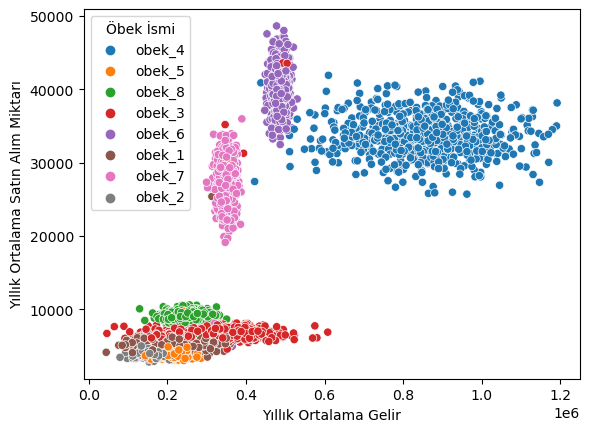

In [22]:
sbn.scatterplot(x="Yıllık Ortalama Gelir",y="Yıllık Ortalama Satın Alım Miktarı",data=egitim_df, hue="Öbek İsmi")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


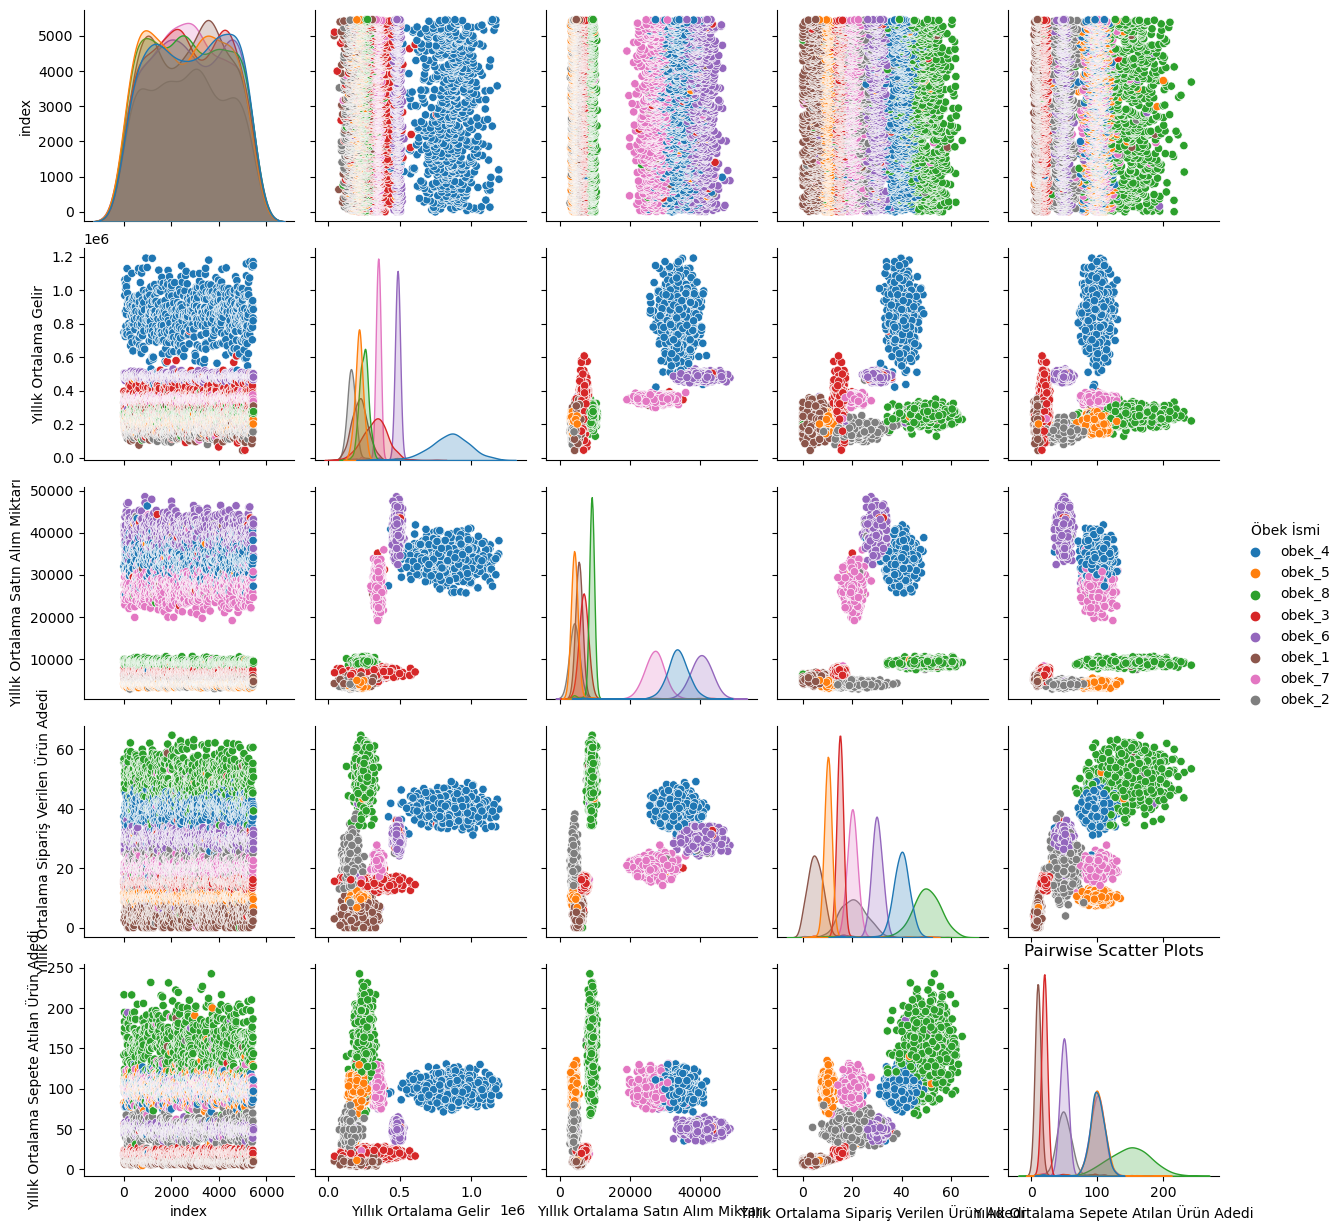

In [23]:
sbn.pairplot(egitim_df, hue='Öbek İsmi')
plt.title('Pairwise Scatter Plots')
plt.show()

In [24]:
egitim_df["Cinsiyet"] =egitim_df["Cinsiyet"].replace(["Erkek"],1)
egitim_df["Cinsiyet"] =egitim_df["Cinsiyet"].replace(["Kadın"],0)
egitim_df = pd.get_dummies(egitim_df, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])

In [25]:
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Erkek"],1)
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Kadın"],0)
test_df = pd.get_dummies(test_df, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])

In [26]:
X = egitim_df.drop("Öbek İsmi",axis=1)
X = X.drop("index",axis=1)
Y = egitim_df["Öbek İsmi"]

In [27]:
Y

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5401, dtype: object

In [28]:
print(egitim_df.groupby(Y).size())

Öbek İsmi
obek_1    684
obek_2    545
obek_3    695
obek_4    690
obek_5    703
obek_6    684
obek_7    689
obek_8    711
dtype: int64


In [29]:
X

,Cinsiyet,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,0,748266.440879,32010.900881,37.310644,102.936904,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,246298.609605,4145.729891,11.554851,82.176053,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,268582.732360,9924.379414,55.353236,141.661426,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,327721.837865,6417.780714,15.417239,17.097397,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1,397431.626948,7886.663061,14.689837,20.470459,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,0,478054.247819,43182.299801,31.356284,51.600436,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5456,1,481852.853651,42107.996193,26.288620,49.190536,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
5457,0,309443.687351,4655.392445,5.156906,9.537384,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
5458,0,266604.268016,9016.165906,39.205399,143.281718,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [31]:
X

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.613265,0.637245,0.577419,0.415218,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.176206,0.028122,0.178823,0.328109,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.195609,0.154441,0.856646,0.577700,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.247101,0.077788,0.238597,0.055049,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.307797,0.109898,0.227340,0.069202,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,0.0,0.377994,0.881449,0.485270,0.199818,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5397,1.0,0.381301,0.857965,0.406843,0.189707,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5398,0.0,0.231186,0.039263,0.079808,0.023328,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5399,0.0,0.193886,0.134588,0.606743,0.584499,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

In [33]:
Y[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [34]:
X = X.values

In [35]:
# Create model here
model = Sequential()
model.add(Dense(32, input_dim = 36, activation = 'relu')) # Rectified Linear Unit Activation Function
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax')) # Softmax for multi-class classification
# Compile model here
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.fit(X,Y,epochs=200)

Epoch 1/200
169/169 [==============================] - 2s 3ms/step - loss: 1.3646 - accuracy: 0.5390
Epoch 2/200
169/169 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.8380
Epoch 3/200
169/169 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9133
Epoch 4/200
169/169 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.9395
Epoch 5/200
169/169 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.9483
Epoch 6/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9522
Epoch 7/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9543
Epoch 8/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.9550
Epoch 9/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9574
Epoch 10/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2538 - accura

In [37]:
loss = pd.DataFrame(model.history.history)

<Axes: >

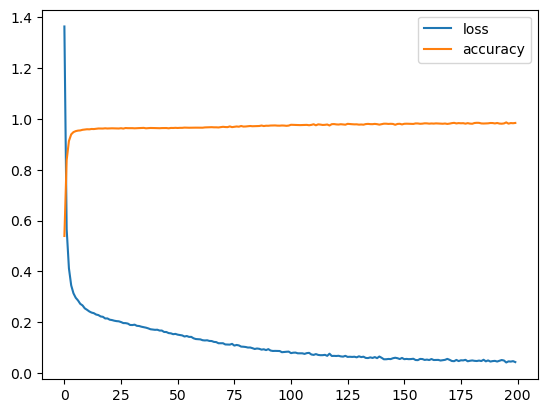

In [38]:
loss.plot()

In [39]:
model.evaluate(X,Y,verbose=0)

[0.038613710552453995, 0.9857434034347534]

In [40]:
test_df = test_df.drop("index",axis=1)

In [41]:
test_df

,Cinsiyet,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,1,365331.930346,5566.587664,15.442635,19.646460,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1,414899.236174,6756.766203,14.957246,19.675863,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,152825.872271,4493.915682,10.907930,46.904518,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,0,489052.908472,42670.646595,32.333021,48.083609,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1,323635.711534,5959.266948,4.519968,12.752491,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0,259190.078834,9559.156534,41.883661,117.627785,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2336,0,194580.563177,4070.232154,20.082996,45.659622,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2337,1,357730.521969,22589.204381,18.922305,100.691379,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2338,1,213179.637202,4205.390562,10.758108,97.778913,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df)
test_df = test_df.values

In [43]:
test_df[0:3]

array([[1.        , 0.24781464, 0.06196133, 0.2412253 , 0.06177956,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0.29096383, 0.08931554, 0.23364316, 0.06190604,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
      

In [44]:
testSonuclari = model.predict(test_df)

74/74 [==============================] - 0s 1ms/step


In [45]:
testSonuclari[0:10]

array([[6.52015164e-10, 8.92363851e-18, 9.99999940e-01, 1.48662124e-10,
        1.04419407e-11, 7.09642733e-10, 1.84506035e-12, 4.82135829e-14],
       [8.72528982e-09, 1.29827087e-11, 9.99997199e-01, 7.71057496e-10,
        4.92635284e-13, 3.70284925e-14, 2.74376384e-06, 1.69282015e-13],
       [4.44869890e-13, 9.99999702e-01, 5.09486564e-10, 4.03075959e-15,
        3.85125126e-11, 9.36966842e-08, 1.12062416e-07, 7.85497178e-09],
       [4.52937199e-09, 1.57032716e-07, 6.99046999e-04, 3.14898259e-08,
        3.22420760e-07, 9.99300480e-01, 1.48682453e-08, 4.87881321e-15],
       [1.33642167e-01, 8.49093018e-11, 8.48854482e-01, 2.18583239e-14,
        1.18320920e-02, 6.60562193e-07, 5.66993607e-03, 6.58239856e-07],
       [1.41280057e-10, 9.99990284e-01, 2.29387318e-08, 2.40207634e-14,
        1.12403331e-09, 5.47482705e-06, 2.76413292e-08, 4.18432182e-06],
       [9.99992311e-01, 8.30303014e-12, 2.79951912e-11, 2.81221183e-12,
        4.68100119e-08, 6.54773729e-08, 2.79051599e-14, 7.

In [46]:
import tensorflow as tf

In [47]:
decodedTestSonuclari = tf.argmax(testSonuclari,axis=1).numpy()

In [48]:
decodedTestSonuclari = decodedTestSonuclari.astype(object)

In [49]:
decodedTestSonuclari[0:20]

array([2, 2, 1, 5, 2, 1, 0, 7, 6, 7, 5, 6, 7, 3, 3, 7, 6, 7, 3, 6],
      dtype=object)

In [50]:
decodedTestSonuclari[decodedTestSonuclari == 0] = 'obek_1'
decodedTestSonuclari[decodedTestSonuclari == 1] = 'obek_2'
decodedTestSonuclari[decodedTestSonuclari == 2] = 'obek_3'
decodedTestSonuclari[decodedTestSonuclari == 3] = 'obek_4'
decodedTestSonuclari[decodedTestSonuclari == 4] = 'obek_5'
decodedTestSonuclari[decodedTestSonuclari == 5] = 'obek_6'
decodedTestSonuclari[decodedTestSonuclari == 6] = 'obek_7'
decodedTestSonuclari[decodedTestSonuclari == 7] = 'obek_8'

In [51]:
veri = {
    'id': range(2340),
    'Öbek İsmi': decodedTestSonuclari
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_3
...,...
2335,obek_8
2336,obek_1
2337,obek_7


In [52]:
Tahmin_Dataframe.to_csv('submission.csv')